## 1. Solving CNF Satisfiability Problem 

We will first explore algorithms for solving the CNF Satisfiability problem. Let's recall this problem below.

### CNF SAT Problem

$\newcommand\bor{\textsf{or}}
\newcommand\band{\textsf{and}}
\newcommand\bnot{\textsf{not}}$

You are given $n$ Boolean (true/false) variables $x_1, \ldots, x_n$ that can take values true/false. You are also given a boolean formula in a special form called conjunctive normal form (CNF) that has the following structure (see https://link.springer.com/referenceworkentry/10.1007%2F978-0-387-30164-8_158 for more details on CNF).
  - The formula is the $\band$ (conjunction, also written using $\land$) of $m \geq 0$ clauses $\varphi: C_1 \ \text{and}\ C_2\ \text{and}\ \cdots \text{and}\ C_m$.
  - Each clause $C_i$ is the $\bor$ (disjunction, also written using $\lor$) of $k_i$ literals: $C_i: \ell_1\ \text{or}\ \ell_2\ \text{or}\ \cdots \text{or}\ \ell_k$.
  - Each literal is a variable $x_i$ or its logical negation $\bnot\ x_i$ (also written as $\overline{x_i}$).
  
Let's take an example.

#### Example (CNF Formula)

Let us take $n= 4$ with Boolean variables $x_1, x_2, x_3, x_4$ and $3$ clauses $C_1, C_2, C_3$, as shown below.

$$ \underset{C_1}{\underbrace{(x_1\ \bor\ x_2\ \bor\ (\bnot\ x_4))}}\ \band\ \underset{C_2}{\underbrace{((\bnot\ x_2)\ \bor\ (\bnot\ x_3)\ \bor\ x_1)}}\ \band\ \underset{C_3}{\underbrace{((\bnot\ x_1) \ \bor\ (\bnot\ x_2)\ \bor\ (\bnot\ x_3))}}$$

The SAT problem asks if there is a truth assignment for the variables $x_1, x_2, \ldots, x_n$ such that 
the formula is satisfied.
 - Since it is an "and" of clauses, it means the each clause has to be satisfied for the entire formula to be satisfied.
 - Also, since each clause is an "or" of literals, at least one literal in each clause must be satisfied.
 - Finally, a literal of the form $x_i$ is satisfied if $x_i$ is assigned to be $true$ and likewise, $\bnot\ x_i$ is satisfied if $x_i$ is assigned to be $false$.

### Question 1

Find a truth assignment that satisfies the formula in the example above.


YOUR ANSWER HERE

SAT problems are represented by noting down (a) the number of variables $n$, (b) the number of clauses $m$, and (c) for each clause, the list of literals (variables or their negations).

We will use a data structure in python that has the following fields:
  - `n`: the number of variables.
  - `clauses` : a list of clauses -- `[c0,...,cm-1]`
    - Each clause `ci` is itself a list `ci: [l1, l2, .., lk]` wherein `li` is a positive number between `1` to `n` representing the variable $x_i$ OR a negative number between `-n` and `-1` representing the literal $\bnot\ x_i$.


### Example

Let's revisit the problem from previous example. It is represented as
 - `n=4`
 - `clauses=[ [ 1, 2, -4], [-2, -3, 1], [-1, -2, -3] ]`
 

We have provided a data-structure called `SATInstance`. Your goal is to complete the function `evaluate` that 
inputs a partial truth assignment: a dictionary that maps variable numbers from `1` - `n`  (inclusive) to `true/false`. If a variable is unmapped then it is not assigned to either value.

  - `evaluate` should return -1 if the partial truth assignment already violates a clause.
  - `evaluate` should return 0 if the partial truth assignment neither violates nor satisfies the formula.
  - `evaluate` should return +1 if the partial truth assignment satisfies each and every clause in the formula.

### Example 1

Revisiting the example above, let us take the partial assignment $x_1 \mapsto \textit{true}$. It leaves $x_2, x_3, x_4$ unassigned.

Under this assignment:
  - The clause $x_1\ \bor\ x_2\ \bor\ \bnot\ x_4$ is true since $x_1$ is true.
  - The clause $\bnot\ x_2\ \bor\ \bnot\ x_3\ \bor\ x_1$ is true since $x_1$ is true.
  - The clause $\bnot\ x_1\ \bor\ \bnot\ x_2\ \bor\ \bnot\ x_3$ is unresolved since $x_1$ is false and we do not know what $x_2$ or $x_3$ are.
  
Therefore your function `evaluate` must return $0$ since at least one clause is unresolved and remaining clauses are all true.

### Example 2
Revisiting the example above, let us take the partial assignment $x_1 \mapsto \textit{true},\ x_2 \mapsto \textit{false}$. It leaves $x_3, x_4$ unassigned.
Under this assignment:
  - The clause $x_1\ \bor\ x_2\ \bor\ \bnot\ x_4$ is true since $x_1$ is true.
  - The clause $\bnot\ x_2\ \bor\ \bnot\ x_3\ \bor\ x_1$ is true since $x_1$ is true.
  - The clause $\bnot\ x_1\ \bor\ \bnot\ x_2\ \bor\ \bnot\ x_3$ is true because $x_2$ is false and the clause has $\bnot\ x_2$.
  
Since all clauses are true, the formula is already satisfied even though we do not know at $x_3, x_4$ are.
`evaluate` must return `+1` for this formula and partial truth assignment.

### Example 3
Revisiting the example above, let us take the partial assignment $x_1 \mapsto \textit{true},\ x_2 \mapsto \textit{true}, x_3 \mapsto \mathit{true}$. It leaves $ x_4$ unassigned.
Under this assignment:
  - The clause $x_1\ \bor\ x_2\ \bor\ \bnot\ x_4$ is true since $x_1$ is true.
  - The clause $\bnot\ x_2\ \bor\ \bnot\ x_3\ \bor\ x_1$ is true since $x_1$ is true.
  - The clause $\bnot\ x_1\ \bor\ \bnot\ x_2\ \bor\ \bnot\ x_3$ is __false__ since $x_1, $x_2, x_3$ are true.
  
  
Since at least one clause is false, the formula is already violated even though we do not know what $ x_4$ is.
`evaluate` must return `-1` for this formula and partial truth assignment.






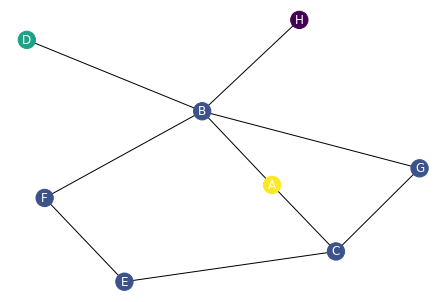

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
plt.show()

In [2]:
class SATInstance:
    # Constructor: provide n the number of variables and
    # an initial list of clauses.
    # Note that variable numbers will go from 1 to n inclusive.
    # we can add clauses using the add_clause method.
    def __init__(self, n, clauses):
        self.n = n
        self.m = len(clauses)
        self.clauses = clauses
        assert self.is_valid()
    # is_valid
    # Check if all clauses are correct.
    # literals in each clause must be between 1 and n or -n and -1 
    def is_valid(self):
        assert self.n >= 1
        assert self.m >= 0
        for c in self.clauses:
            for l in c:
                assert (1 <= l and l <= self.n) or (-self.n <= l and l <= -1)
        return True
    
    # add_clause
    # Add a new clause to the list of clauses
    def add_clause(self, c):
        #check the clause we are adding.
        for l in c:
            assert (1 <= l and l <= self.n) or (-self.n <= 1 and l <= -1)
        self.clauses.append(c)
    
    ## Function: evaluate_literal
    # Evaluate a literal against a partial truth assignment
    # return 0 if the partial truth assignment does not have the variable corresponding to the literal
    # return 1 if the partial truth assignment has the variable and the literal is true
    # return -1 if the partial truth assignment has the variable and the literal is false
    def evaluate_literal(self, partial_truth_assignment, literal):
        var = abs(literal) # literal may be negated. First remove any negation using abs
        if var not in partial_truth_assignment:
            return 0
        v = partial_truth_assignment[var]
        if 1 <= literal <= self.n:
            return 1 if v else -1
        else:
            return -1 if v else 1
    
    ## TODO: Write your code here
    # Function: evaluate
    # See description above: partial_truth_assignment is a dictionary from 1 .. n to true/false.
    # since it is partial, we may have variables with no truth assignments.
    # use evaluate_literal function as a useful primitive
    # return +1 if the formula is already satisfied under partial_truth_assignment: i.e, all clauses are true
    # return 0 if formula is indeterminate under partial_truth_assignment, all clauses are true or unresolved and at least one clause is unresolved.
    # return -1 if formula is already violated under partial_truth_assignment, i.e, at least one clause is false
    def evaluate(self, partial_truth_assignment):
        # your code here
        for c in self.clauses:
            sat_c = -1
            ls = [self.evaluate_literal(partial_truth_assignment, l) for l in c]
            if 1 in ls:
                sat_c = 1
            elif 0 in ls:
                sat_c = 0
            if sat_c != 1:
                return sat_c
        return 1

In [2]:
## BEGIN TESTS

print('-test1-')
f1 = SATInstance(4, [ [ 1, 2, -4], [-2, -3, 1], [-1, -2, -3] ])
t1 = {1:True, 2:False}
e1 = f1.evaluate(t1)
assert e1 == 1, f'Expected that f1 is satisfied by t1 but your code returns: {e1}'

print('-test2-')
t2 = {1:False, 2: False}
e2 = f1.evaluate(t2)
assert e2 == 0, f'Expected that f1 is indeterminate under t2. Your code returns: {e2}'

print('-test3-')
f2 = SATInstance(5, [[1,2,-5],[-4,-2,-1], [1, 3, 5], [-1, -5, -2], [1, 2, -4]])
t3 = {1:True}
e3 = f2.evaluate(t3)
assert e3 == 0, f'Expected that f2 is indeterminate under t3. Your code returns {e3}'

print('-test4-')
t4 = {1: True, 2: False}
e4 = f2.evaluate(t4)
assert e4 == 1, f'Expected that f2 is satisfied by t4. Your code returns {e4}'

print('-test5-')
t5 = {1: False, 3: False, 5:False}
e5 = f2.evaluate(t5)
assert e5 == -1, f'Expected that f2 is violated by t5. Your code returns {e5}'
print('All tests passed: 10 points!')
## END TESTS

-test1-
-test2-
-test3-
-test4-
-test5-
All tests passed: 10 points!


The DPLL (Davis-Putnam-Loveland-Logemann) algorithm is a simple recursive algorithm for solving a SAT problem (for those of you who have looked up this algorithm online, we will not be considering unit propagation, pure literal elimination or other search additions that are important). The basic idea is to search for a partial truth assignment recursively. DPLL algorithm first sets the current variable
$x_j$ to $false$. It then recursively searches for a solution. If it finds one, the solution is reported back. If not, it sets $x_j$ to $true$ and checks recursively. 

The pseudo code is given below. Let `n` be the number of variables in the formula.

```python
def DPLLAlgorithm(formula, truth_assign, j):
  # j is the id of the current variable we are considering
  # initially j is set to 1.
  # truth_assign is a partial truth assignment
  n = number of variables in the formula
  assert 1 <= j <= n 
  # Try to set xj to true and check the formula
  truth_assign0 = extend truth_assign with (xj -> true)
  # evaluate the formula under the partial truth assignment
  e0 = evaluate formula under truth_assign0
  # if it is already satisfied
  if e0 == satisfied: # end early
     then return SUCCESS, truth_assign0
  if e0 == indeterminate:# if it is indeterminate
     # recursively call the DPLLAlgorithm
     (result, final_truth_assign) = DPLLAlgorithm(formula, truth_assign0, j+1)
     # if it succeeds, return the truth assignment
     if result == SUCCESS:
        return SUCCESS, final_truth_assign
        
  # Now try to set xj to false and check the formula
  truth_assign1 = extend truth_assign with (xj -> false)
  e1 = evaluate formula under truth_assign1
  if e1 == satisfied:
      then return SUCCESS, truth_assign1
  if e1 == indeterminate:
     (result, final_truth_assign) = DPLLAlgorithm(formula, truth_assign1, j+1)
     # if it succeeds, return the truth assignment
     if result == SUCCESS:
        return SUCCESS, final_truth_assign
  # Fell through all cases
  return FAILURE, None
```
  
  
__Notes__

 - We will use the `SATInstance` data structure to represent our formula.
 - We will use `evaluate` function inside `SATInstance`.
 - Use a python dictionary to represent partial truth assignments.
   - We have provided a useful function that will help you extend a truth assignment.
   - Note that modifying a dictionary inside a function also modifies it for its caller. We have provided a helpful function `forget_var_in_truth_assign` to remove a key from a dictionary.

In [71]:
from matplotlib.gridspec import GridSpec

def extend_truth_assignment(truth_assign, j, b):
    truth_assign[j] = b
    return truth_assign
    
def forget_var_in_truth_assign(truth_assign, j):
    # remove variable from a dictionary
    if j in truth_assign:
        del truth_assign[j]
    return truth_assign

# Implement the DPLL pseudo code with the following modifications
#   return (True, partial_truth_assignment) if the formula is satisfiable
#   return (False, None) if the formula is unsatisfiable. 
# You may use the extend_truth_assignment and forget_var_in_truth_assign functions.
# Remember that a change in a dictionary is reflected back to the caller and this is important to keep in mind.
# Use the evaluate function in SATInstance class to evaluate a formula under partial truth assignment.
def dpll_algorithm(formula, partial_truth_assign, j):
    assert 1 <= j and j <= formula.n
    assert j not in partial_truth_assign
    # your code here
    for val in [True, False]:
        extend_truth_assignment(partial_truth_assign, j, val)
        plot(formula, partial_truth_assign, None)
        e = formula.evaluate(partial_truth_assign)
        if e == 1:
            return True, partial_truth_assign
        if e == 0:
            res, final_truth_assignment = dpll_algorithm(formula, partial_truth_assign, j+1)
            if res == 1:
                return True, final_truth_assignment
    
    forget_var_in_truth_assign(partial_truth_assign, j)
    return False, None

def solve_formula(formula):
    global id
    s, a = dpll_algorithm(formula, {}, 1)
    id -= 1
    plot(formula, a, s)
    return (s, a)
    
def plot(formula, partial_truth_assignment, satisfy):
    global id, fid
    id += 1
    fid += 1
    n = formula.n
    fig = plt.figure(figsize=(20,20), constrained_layout=True)
    #plt.subplots_adjust(0,0,1,0.95,0.05,0.05)
    
    gs = GridSpec(3, 3, figure=fig)
    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1:, :])

    colors = {True:'green', False:'red'}
    values = []
    G = nx.Graph()
    for node in range(1,n+1):
        values.append(colors[partial_truth_assignment[node]] if not partial_truth_assignment is None and node in partial_truth_assignment else 'gray') 
        G.add_node('x{}'.format(node))
    posx=list(range(1,n+1))
    posy=n*[0]
    pos={'x{}'.format(i+1):[posx[i],posy[i]] for i in range(n)}
    nx.draw(G, pos=pos, node_color=values, with_labels=True, font_color='white', node_size=1000, ax=ax1)
    ax1.set_title('Truth assignment with DPLL SAT-solver (T:green, F:red, unassigned:gray)\n n: {} m: {} assignment: {}'.format(n, len(formula.clauses), id), size=30)
    ax1.axis('off')
    
    ax2.axis([0, 10, 0, 10])
    ax2.axis('off')
    x, y = 2, 9
    i = 1
    sat = True
    for c in formula.clauses:
        #print(c)
        ctxt = 'C{}: '.format(i) 
        j = 0
        for l in c:
            if l < 0:
                ctxt += '¬'
            l = abs(l)
            ctxt += 'x{}'.format(l)
            j += 1
            if j < len(c):
                ctxt += ' ∨ '
        sat_c = -1
        if not partial_truth_assignment is None:
            ls = [formula.evaluate_literal(partial_truth_assignment, l) for l in c]
        else:
            ls = [0]*len(c)
        if 1 in ls:
            sat_c = 1
        elif 0 in ls:
            sat_c = 0            
        if sat_c != 1:
            sat = False
        colors = {1:'green', -1:'red', 0:'gray'}   
        ax2.text(x, y, ctxt, fontsize=25, bbox=dict(boxstyle="Square,pad=0.3", fc=colors[sat_c], ec="b", lw=2))
        y -= 1
        if y < 1:
            x, y = 6, 9
        i += 1

    title = 'Evaluation of SAT Clauses (satisfied:green, not-satisfied:red, unresolved:gray)'
    #if sat:
    if satisfy == True:
        title += '\nSATISFIED' 
    elif satisfy == False:
        title += '\nUNSATISFIABLE' 
        
    ax2.set_title(title, size=30)
    plt.savefig('out/out_{:04d}.png'.format(fid))
    plt.close()
    #plt.show()

fid = 0
id = 0
f1 = SATInstance(4, [ [ 1, 2, -4], [-2, -3, 1], [-1, -2, -3] ])
(e, t) = solve_formula(f1)

id = 0
f2 = SATInstance(5, [[1,2,-5],[-4,-2,-1], [1, 3, 5], [-1, -5, -2], [1, 2, -4]])
(e2, t2) = solve_formula(f2)

id = 0
f3 = SATInstance(5, [[1, 2, -5, -4], [1, 2, -5, 4], [-1], [-2,-5], [5]])
(e3, t3) = solve_formula(f3)

id = 0
f4 = SATInstance(10, [
  [-1, -5, -4, 8],
  [1, 5, 8, 2],
   [2, 1, 3, 9],
    [-2, 4, 5, 6, -7],
    [-1, 2, -1, 7, 8],
    [2, -3, 1, 4, 9 ],
    [1, 10],
    [-10],
    [1, 5, 8, 3, 10]
])
(e4, t4) = solve_formula(f4)

id = 0
f5 = SATInstance(16,[
     [1, 2], [-2 , -4],[3, 4], [-4, -5], [5, -6], [6, -7], [6, 7], [7, -16],
     [8, -9],[8, -14], [9, 10], [9, -10], [-10, -11], [10, 12], [11, 12], [13, 14],
     [14, -15], [15, 16]])
(e5, t5) = solve_formula(f5)

18 1 2 3
18 4 5 6
18 7 8 9
18 10 11 12
18 13 14 15
18 16 17 18
{1: True, 2: False, 3: False, 4: True, 5: False, 6: False, 7: True, 8: False, 9: False, 10: True, 11: False, 12: False}
here ['red', 'red', 'red', 'red', 'gray', 'gray']
{1: True, 2: False, 3: False, 4: True, 5: False, 6: False, 7: True, 8: False, 9: False, 10: True, 11: False, 12: False, 13: False, 14: True, 15: True}
here ['red', 'red', 'red', 'red', 'gray', 'gray']
{1: True, 2: False, 3: False, 4: True, 5: False, 6: False, 7: True, 8: False, 9: False, 10: True, 11: False, 12: False, 13: False, 14: False, 15: True, 16: True, 17: False, 18: False}
here ['red', 'red', 'red', 'red', 'blue', 'red']
{1: True, 2: False, 3: False, 4: True, 5: False, 6: False, 7: True, 8: False, 9: False, 10: False, 11: True, 12: False, 13: True, 14: False, 15: False, 16: True, 17: False}
here ['red', 'red', 'red', 'green', 'red', 'gray']
{1: True, 2: False, 3: False, 4: True, 5: False, 6: False, 7: True, 8: False, 9: False, 10: False, 11: True, 

{1: True, 2: False, 3: False, 4: True, 5: False, 6: False, 7: True, 8: False, 9: False, 10: False, 11: True, 12: False}
here ['red', 'red', 'red', 'green', 'gray', 'gray', 'gray']
{1: True, 2: False, 3: False, 4: True, 5: False, 6: False, 7: True, 8: False, 9: False, 10: False, 11: True, 12: False, 13: True, 14: False, 15: False, 16: True, 17: False, 18: False, 19: False, 20: False}
here ['red', 'red', 'red', 'green', 'red', 'red', 'gray']
{1: True, 2: False, 3: False, 4: True, 5: False, 6: False, 7: True, 8: False, 9: False, 10: False, 11: True, 12: False, 13: True, 14: False, 15: False, 16: False, 17: False, 18: True}
here ['red', 'red', 'red', 'green', 'red', 'blue', 'gray']
{1: True, 2: False, 3: False, 4: True, 5: False, 6: False, 7: True, 8: False, 9: False, 10: False, 11: True, 12: False, 13: False, 14: True, 15: False, 16: True, 17: False}
here ['red', 'red', 'red', 'green', 'green', 'gray', 'gray']
{1: True, 2: False, 3: False, 4: True, 5: False, 6: False, 7: True, 8: False, 9

{1: True, 2: False, 3: False, 4: True, 5: False, 6: False, 7: False, 8: True, 9: False, 10: False, 11: False, 12: True, 13: True, 14: False, 15: False, 16: True, 17: False, 18: False, 19: False, 20: True, 21: True}
here ['red', 'red', 'green', 'blue', 'red', 'red', 'gray']
{1: True, 2: False, 3: False, 4: True, 5: False, 6: False, 7: False, 8: True, 9: False, 10: False, 11: False, 12: True, 13: True, 14: False, 15: False, 16: False, 17: True, 18: False, 19: False, 20: False, 21: False}
here ['red', 'red', 'green', 'blue', 'red', 'green', 'gray']
{1: True, 2: False, 3: False, 4: True, 5: False, 6: False, 7: False, 8: True, 9: False, 10: False, 11: False, 12: True, 13: False, 14: True, 15: False, 16: True}
here ['red', 'red', 'green', 'blue', 'green', 'gray', 'gray']
{1: True, 2: False, 3: False, 4: True, 5: False, 6: False, 7: False, 8: True, 9: False, 10: False, 11: False, 12: True, 13: False, 14: True, 15: False, 16: False, 17: True, 18: False}
here ['red', 'red', 'green', 'blue', 'gr

KeyboardInterrupt: 

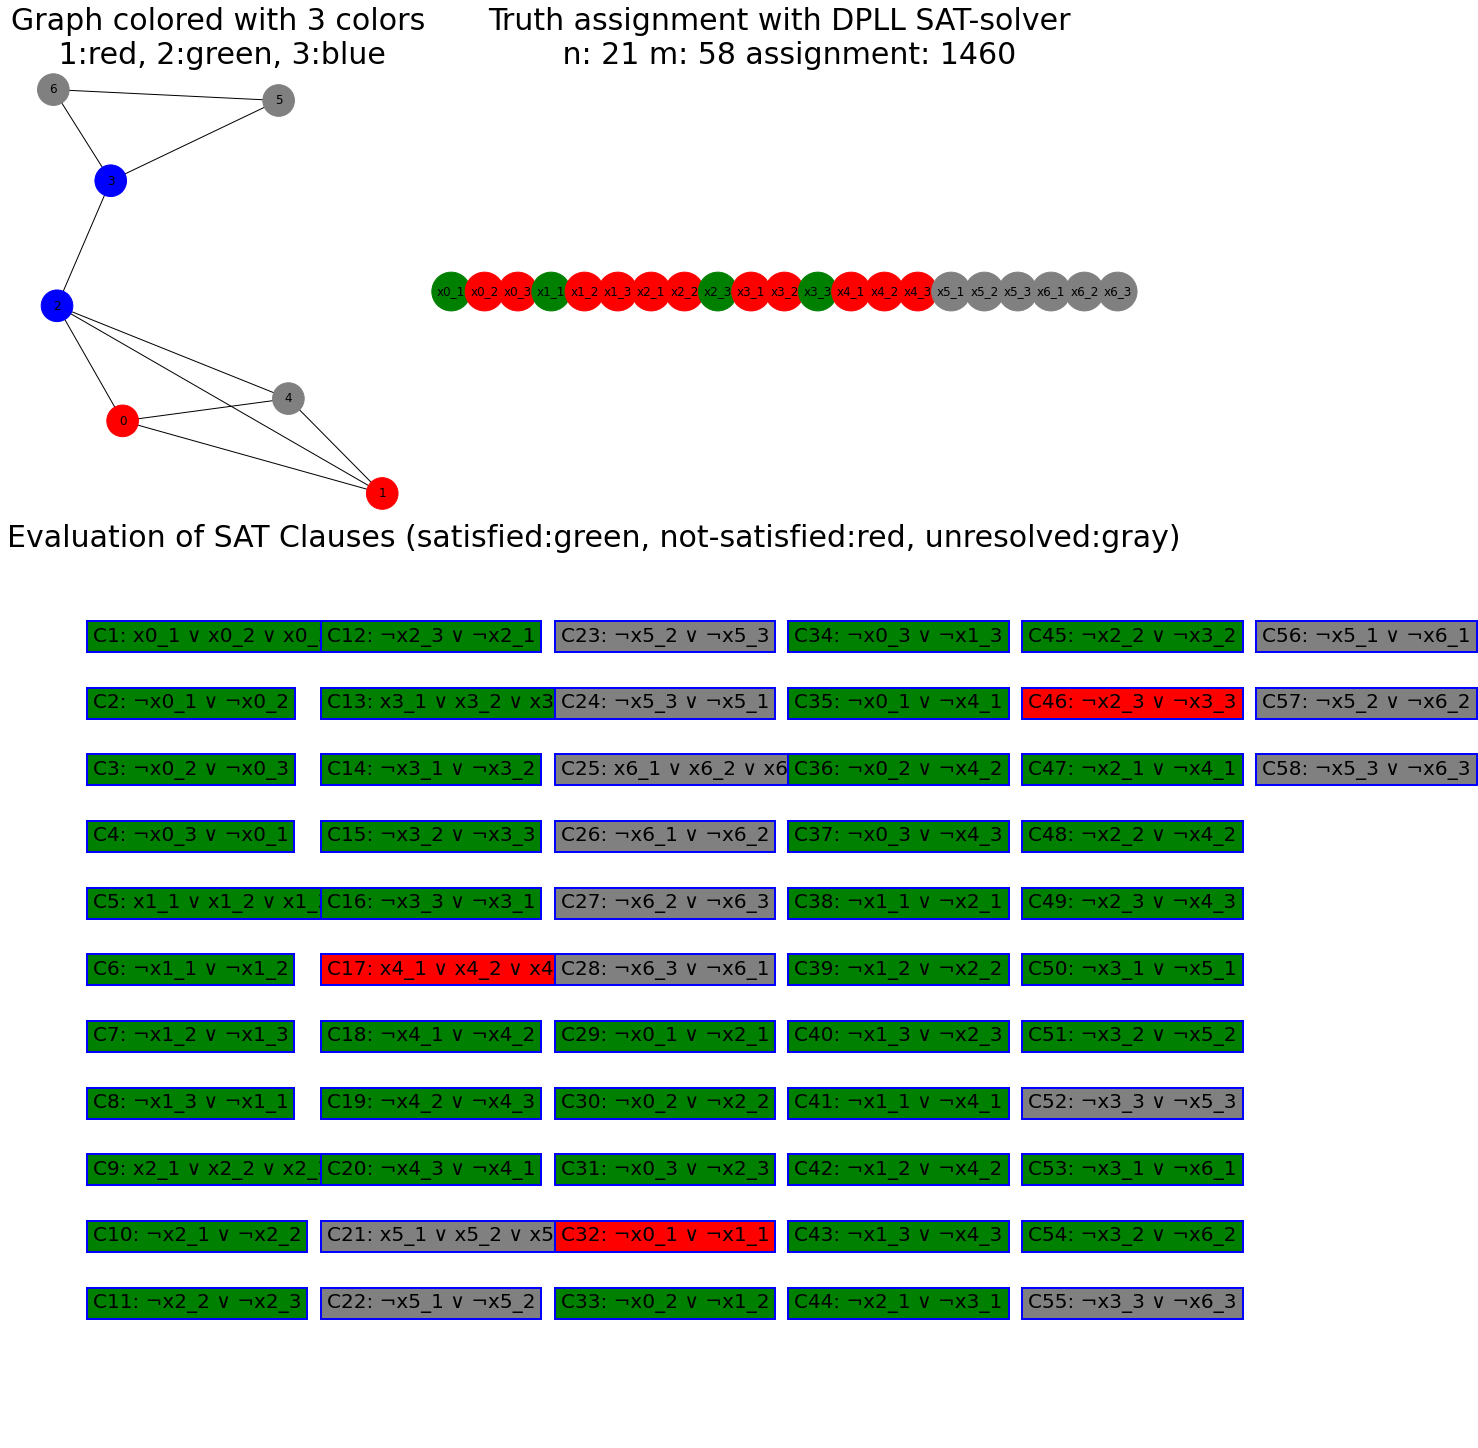

In [118]:
from matplotlib.gridspec import GridSpec

def extend_truth_assignment(truth_assign, j, b):
    truth_assign[j] = b
    return truth_assign
    
def forget_var_in_truth_assign(truth_assign, j):
    # remove variable from a dictionary
    if j in truth_assign:
        del truth_assign[j]
    return truth_assign

# Implement the DPLL pseudo code with the following modifications
#   return (True, partial_truth_assignment) if the formula is satisfiable
#   return (False, None) if the formula is unsatisfiable. 
# You may use the extend_truth_assignment and forget_var_in_truth_assign functions.
# Remember that a change in a dictionary is reflected back to the caller and this is important to keep in mind.
# Use the evaluate function in SATInstance class to evaluate a formula under partial truth assignment.
def dpll_algorithm(formula, partial_truth_assign, j, graph):
    assert 1 <= j and j <= formula.n
    assert j not in partial_truth_assign
    # your code here
    for val in [True, False]:
        extend_truth_assignment(partial_truth_assign, j, val)
        plot(graph, formula, partial_truth_assign, None)
        e = formula.evaluate(partial_truth_assign)
        if e == 1:
            return True, partial_truth_assign
        if e == 0:
            res, final_truth_assignment = dpll_algorithm(formula, partial_truth_assign, j+1, graph)
            if res == 1:
                return True, final_truth_assignment
    
    forget_var_in_truth_assign(partial_truth_assign, j)
    return False, None

def solve_formula(formula, graph):
    global id
    s, a = dpll_algorithm(formula, {}, 1, graph)
    id -= 1
    plot(graph, formula, a, s)
    return (s, a)

# Input: a graph that is an instance of the `UndirectedGraph` class
# Output: an instance of `SATInstance` that encodes the 3 coloring problem
# Useful functions:
#   SATInstance class add_clause
#   UndirectedGraph class get_list_of_edges 
def translate_three_coloring(graph):
    n_boolean_vars = graph.n * 3 # 3 boolean variables for each vertex
    # You can define your own scheme for translating x_i,j into the index of a prop. var.
    # we propose using x_i,j --> 3 *i + j
    s = SATInstance(n_boolean_vars, []) # no clauses
    # your code here
    for i in range(graph.n):
        print(n_boolean_vars, 3*i+1, 3*i+2, 3*i+3)
        s.add_clause([3*i+1, 3*i+2, 3*i+3])
        s.add_clause([-(3*i+1), -(3*i+2)])
        s.add_clause([-(3*i+2), -(3*i+3)])
        s.add_clause([-(3*i+3), -(3*i+1)])
    for (i, j) in graph.get_list_of_edges(): 
        s.add_clause([-(3*i+1), -(3*j+1)])
        s.add_clause([-(3*i+2), -(3*j+2)])
        s.add_clause([-(3*i+3), -(3*j+3)])
    return s

# Input: graph --> an instance of UndirectedGraph with n vertices
#         truth_assign --> dictionary with key in range 1 ... 3*n mapping each key to true/false
#                           output from SAT solver.
# Output: A dictionary mapping vertices 0,..., n-1 to colors {1, 2, 3}   
# This function will be implemented based on the scheme you used in previous function translate_three_coloring
def extract_graph_coloring_from_truth_assignment(graph, truth_assign):
    # your code here
    coloring = dict()
    for i in range(graph.n):
        color = None
        for j in range(1,4):
            if 3*i+1 in truth_assign and 3*i+2 in truth_assign and 3*i+3 in truth_assign and \
               truth_assign[3*i+j] and sum([truth_assign[3*i+j] for j in range(1,4)]) == 1:
                color = j
                break
        coloring[i] = color
    return coloring
    
def solve_three_coloring(graph):
    s = translate_three_coloring(graph)
    res, truth_assign = solve_formula(s, graph)
    if res: 
        return extract_graph_coloring_from_truth_assignment(graph, truth_assign)
    else: 
        return None
    
def plot(graph, formula, partial_truth_assignment, satisfy):
    global id, fid
    id += 1
    fid += 1
    n = graph.n
    
    if id % 20 and not satisfy:
        return
    
    fig = plt.figure(figsize=(20,20), constrained_layout=True)
    #plt.subplots_adjust(0,0,1,0.95,0.05,0.05)
    
    gs = GridSpec(3, 3, figure=fig)
    ax1 = fig.add_subplot(gs[0, :1])
    ax2 = fig.add_subplot(gs[0, 1:])
    ax3 = fig.add_subplot(gs[1:, :])
    
    print(partial_truth_assignment)
    colors = extract_graph_coloring_from_truth_assignment(graph, partial_truth_assignment)
    values = ['white', 'red', 'green', 'blue']
    colors = ['gray' if colors[i] is None else values[colors[i]] for i in range(n)]
    print('here', colors)
    G = nx.Graph()
    for node in range(n):
        G.add_node(node)
    for (i, j) in graph.get_list_of_edges():
        G.add_edge(i, j)
    fixed_positions = {1:(0,0),2:(-1,2)}#dict with two of the positions set
    fixed_nodes = fixed_positions.keys()
    pos = nx.spring_layout(G,pos=fixed_positions, fixed = fixed_nodes)
    nx.draw_networkx(G,pos, node_color=colors, with_labels=True, font_color='k', node_size=1000, ax=ax1)
    ax1.set_title('Graph colored with 3 colors\n 1:red, 2:green, 3:blue'.format(n, len(formula.clauses), id), size=30)
    ax1.axis('off')
    
    colors = {True:'green', False:'red'}
    values = []
    n = formula.n
    G = nx.Graph()
    posx=list(range(1,n+1))
    posy=n*[0]
    pos = {}
    for node in range(1,n+1):
        values.append(colors[partial_truth_assignment[node]] if not partial_truth_assignment is None and node in partial_truth_assignment else 'gray') 
        G.add_node('x{}_{}'.format((node-1)//3, (node-1)%3+1))
        pos['x{}_{}'.format((node-1)//3, (node-1)%3+1)] = [posx[node-1],posy[node-1]]
    nx.draw(G, pos=pos, node_color=values, with_labels=True, font_color='k', node_size=1500, ax=ax2)
    ax2.set_title('Truth assignment with DPLL SAT-solver \n n: {} m: {} assignment: {}'.format(n, len(formula.clauses), id), size=30)
    ax2.axis('off')
    
    
    ax3.axis([0, 10, 0, 10])
    ax3.axis('off')
    x, y = 0.5, 9
    i = 1
    sat = True
    for c in formula.clauses:
        #print(c)
        ctxt = 'C{}: '.format(i) 
        j = 0
        for l in c:
            if l < 0:
                ctxt += '¬'
            l = abs(l)
            ctxt += 'x{}_{}'.format((l-1)//3, (l-1)%3+1)
            j += 1
            if j < len(c):
                ctxt += ' ∨ '
        sat_c = -1
        if not partial_truth_assignment is None:
            ls = [formula.evaluate_literal(partial_truth_assignment, l) for l in c]
        else:
            ls = [0]*len(c)
        if 1 in ls:
            sat_c = 1
        elif 0 in ls:
            sat_c = 0            
        if sat_c != 1:
            sat = False
        colors = {1:'green', -1:'red', 0:'gray'}   
        ax3.text(x, y, ctxt, fontsize=20, bbox=dict(boxstyle="Square,pad=0.3", fc=colors[sat_c], ec="b", lw=2))
        y -= 0.75
        if y < 1:
            y = 9
            x += 2.1
        i += 1

    title = 'Evaluation of SAT Clauses (satisfied:green, not-satisfied:red, unresolved:gray)'
    #if sat:
    if satisfy == True:
        title += '\nSATISFIED' 
    elif satisfy == False:
        title += '\nUNSATISFIABLE' 
        
    ax3.set_title(title, size=30)
    plt.savefig('out1/out_{:04d}.png'.format(fid))
    plt.close()
    #plt.show()

#fid = 0    
#id = 0
#g0 = UndirectedGraph(3)
#g0.add_edge(0,1)
#g0.add_edge(1,2)
#g0.add_edge(0,2)
#coloring = solve_three_coloring(g0)

#id = 0
#g1 = UndirectedGraph(4)
#g1.add_edge(0, 1)
#g1.add_edge(0, 2)
#g1.add_edge(0, 3)
#g1.add_edge(1, 2)
#g1.add_edge(1, 3)
#g1.add_edge(2, 3)
#coloring = solve_three_coloring(g1)

fid = 336
id = 0
g2 = UndirectedGraph(6)
g2.add_edge(0, 1)
g2.add_edge(1, 2)
g2.add_edge(2, 3)
g2.add_edge(3, 4)
g2.add_edge(4, 5)
g2.add_edge(0, 3)
g2.add_edge(2, 4)
coloring = solve_three_coloring(g2)

#g2.add_edge(1,3)
#g2.add_edge(0, 2)
#coloring = solve_three_coloring(g2)

#fid = 40
#id = 0
#g1 = UndirectedGraph(5)
#g1.add_edge(0, 1)
#g1.add_edge(1, 2)
#g1.add_edge(2, 0)
#g1.add_edge(1, 3)
#g1.add_edge(3, 4)
#g1.add_edge(1, 4)
#g1.add_edge(4, 0)
#coloring = solve_three_coloring(g1)

#fid = 336
id = 0
g2 = UndirectedGraph(7)
g2.add_edge(2, 3)
g2.add_edge(2, 1)
g2.add_edge(2, 0)
g2.add_edge(2, 4)
g2.add_edge(3, 5)
g2.add_edge(3, 6)
g2.add_edge(5, 6)
g2.add_edge(1, 0)
g2.add_edge(1, 4)
#coloring = solve_three_coloring(g2)

id = 0
g2.add_edge(0, 4)
coloring = solve_three_coloring(g2)

In [54]:
print('-- formula 1 --')
f1 = SATInstance(4, [ [ 1, 2, -4], [-2, -3, 1], [-1, -2, -3] ])
(e, t) = solve_formula(f1)
print(e, t)
assert e, 'f1 should be satisfiable'
assert t != None, 'does not return a truth assignment'
assert f1.evaluate(t) == 1, 'Truth assignment does not evaluate to expected value of true'

print('-- formula 2 -- ')
f2 = SATInstance(5, [[1,2,-5],[-4,-2,-1], [1, 3, 5], [-1, -5, -2], [1, 2, -4]])
(e2, t2) = solve_formula(f2)
print(e2, t2)
assert e2, 'f2 must be satisfiable'
assert t2 != None, 'does not return a truth assignment'
assert f2.evaluate(t2) == 1, 'Truth assignment does not evaluate to expected value of true'

print('--formula 3 --')
f3 = SATInstance(5, [[1, 2, -5, -4], [1, 2, -5, 4], [-1], [-2,-5], [5]])
(e3, t3) = solve_formula(f3)
print(e3, t3)
assert not e3, 'f3 is unsatisfiable'
assert t3 == None

print('--formula 4--')
f4 = SATInstance(10, [
  [-1, -5, -4, 8],
  [1, 5, 8, 2],
   [2, 1, 3, 9],
    [-2, 4, 5, 6, -7],
    [-1, 2, -1, 7, 8],
    [2, -3, 1, 4, 9 ],
    [1, 10],
    [-10],
    [1, 5, 8, 3, 10]
])

(e4, t4) = solve_formula(f4)
print(e4, t4)
assert e4, 'f4 must be satisfiable'
assert t4 != None, 'does not return a truth assignment'
assert f4.evaluate(t4) == 1, 'Truth assignment does not evaluate to expected value of true'

print('--formula 5--')
f5 = SATInstance(16,[
     [1, 2], [-2 , -4],[3, 4], [-4, -5], [5, -6], [6, -7], [6, 7], [7, -16],
     [8, -9],[8, -14], [9, 10], [9, -10], [-10, -11], [10, 12], [11, 12], [13, 14],
     [14, -15], [15, 16]])
(e5, t5) = solve_formula(f5)
print(e5, t5)
assert e5, 'f5 is satisfiable'
assert t5 != None
assert f5.evaluate(t5) == 1, 'Truth assignment does not evaluate to expected value of true'

print('All tests passed: 20 points')

-- formula 1 --
True {1: True, 2: True, 3: False}
-- formula 2 -- 
True {1: True, 2: True, 3: True, 4: False, 5: False}
--formula 3 --
False None
--formula 4--
True {1: True, 2: True, 3: True, 4: True, 5: True, 6: True, 7: True, 8: True, 9: True, 10: False}
--formula 5--
True {1: True, 2: True, 3: True, 4: False, 5: True, 6: True, 7: True, 8: True, 9: True, 10: True, 11: False, 12: True, 13: True, 14: True, 15: True}
All tests passed: 20 points


## 2. Use SAT solver to solve 3-coloring problem.

The 3-color problem asks given a undirected graph $G$ whether it can be colored with $3$ or fewer colors. I.e, assign each vertex of the graph one of three colors say Red, Blue, Green such that vertices connected by an edge should not have the same color.

### Examples

We have three graphs below: the two to the left are 3-colorable and the colorings are shown. The graph to the right is a "4-clique" -- 4 nodes all connected to each other and is not 3-colorable.

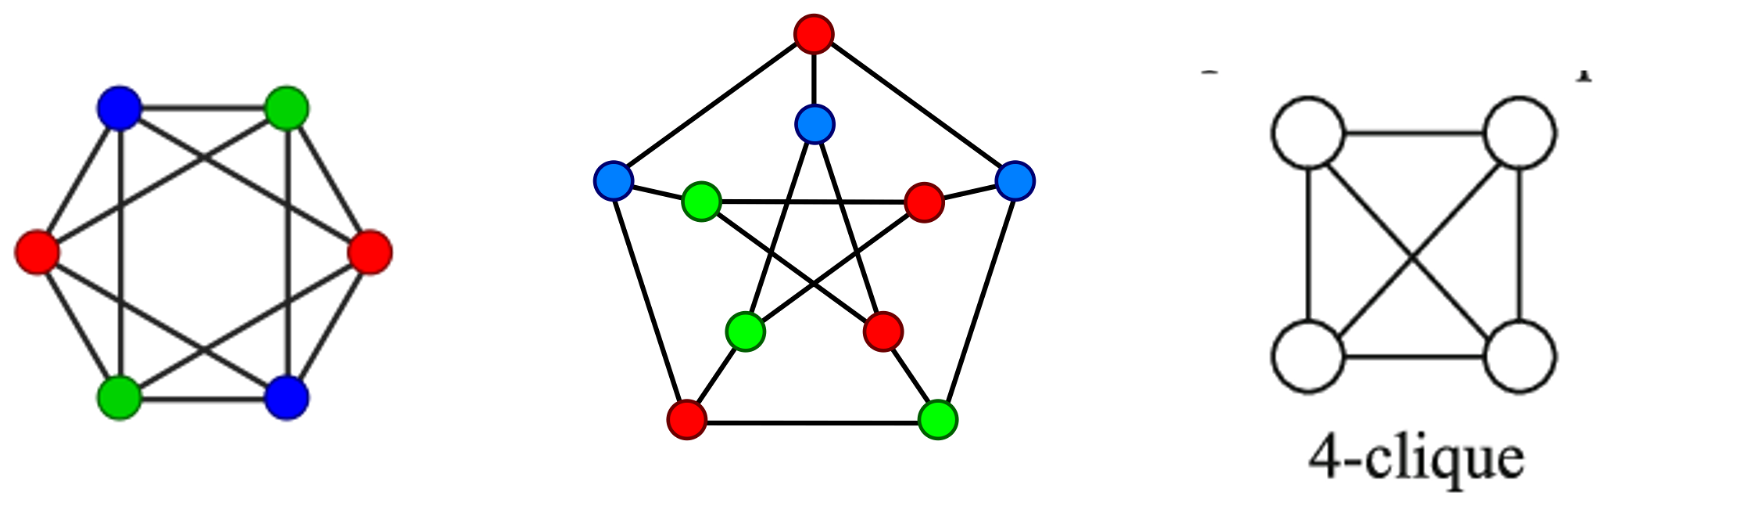

### 3-Coloring Problem

The 3-coloring problem inputs an undirected graph $G$, there exists a $3-$coloring (an assignment of one of three colors $R, G \ \text{or}\ B$) to each vertex, such that no two vertices connected by an edge have the same color. 

The three coloring problem is an interesting problem in computer science: minor variants of it have very important applications ranging from compilers, computer chip design to resource allocation problems. It is also an NP complete problem, as we will see. In other words, if we find a polynomial time ("efficient") algorithm to solve the $3$-coloring problem, then we can solve all NP-complete problems (including SAT) in polynomial time.


### Part A

Given a graph $G$ and a proposed $3$ coloring represented as a map from vertices to colors $\{1,2, 3\}$, check that it is a valid three coloring of the graph $G$.

In [72]:
class UndirectedGraph:
    # n_verts: number of vertices of the graph
    #   vertices are labeled from 0... n-1
    # adj_list: an adjacency list represented as a list of lists.
    #  if set to None, we will initialize it as an empty graph
    def __init__(self, n_verts, adj_list=None):
        self.n = n_verts
        if adj_list == None:
            adj_list = [ [] for j in range(self.n)] # initialize as empty list of lists
        else:
            assert len(self.adj_list) == n_verts
            for lst in adj_list:
                for elt in lst:
                    assert 0 <= elt and elt < self.n_verts
        
        self.adj_list = adj_list
    
    def add_edge(self, i, j):
        assert 0 <= i and i < self.n
        assert 0 <= j and j < self.n
        assert i != j
        self.adj_list[i].append(j)
        self.adj_list[j].append(i)
        
    def get_list_of_edges(self):
        return [ (i, j) for i in range(self.n) for j in self.adj_list[i] if i < j ]
            
        
  

In [81]:
def is_three_coloring(graph, coloring):
    n = graph.n
    for i in range(n):
        if i not in coloring:
            return False # every vertex must receive a color
        if coloring[i] < 1 or coloring[i] > 3:
            return False # coloring must be between 1 and 3 inclusive
    # Your code should complete the check below
    # use the provided function graph.get_list_of_edges() to get a list of edges
    # or feel free to extend the graph data structure as you will.
    # your code here
    for (i, j) in graph.get_list_of_edges():
        if coloring[i] == coloring[j]:
            return False
    return True

In [7]:
print('--- Test 1 ---')
g1 = UndirectedGraph(5)
g1.add_edge(0, 1)
g1.add_edge(1, 2)
g1.add_edge(2, 0)
g1.add_edge(1, 3)
g1.add_edge(3, 4)
g1.add_edge(1, 4)
g1.add_edge(4,0)


coloring1 = {0:1, 1:2, 2:3, 3:1, 4: 3}
assert is_three_coloring(g1, coloring1), 'Test 1 fail: Coloring should be valid of g1.'

print('--- Test 2 ---')
g2 = UndirectedGraph(7)
g2.add_edge(2, 3)
g2.add_edge(2, 1)
g2.add_edge(2, 0)
g2.add_edge(2, 4)
g2.add_edge(3, 5)
g2.add_edge(3, 6)
g2.add_edge(5, 6)
g2.add_edge(1, 0)
g2.add_edge(1, 4)
g2.add_edge(0, 4)

coloring2 = {2: 1, 3: 2, 4: 2, 0: 1, 1: 3, 5: 3, 6: 1}

assert not is_three_coloring(g2, coloring2), 'Test 2 fail: Coloring should be not be valid of g2.'


print('-- Test 3 --- ')

coloring3 = {2: 3, 3: 2, 4: 2, 0: 2, 1: 1, 5: 3, 6: 1}

assert not is_three_coloring(g2, coloring3), 'Test 3 fail: Coloring should be not be valid of g2.'

print('All Tests Passed (10 points)!')

--- Test 1 ---
--- Test 2 ---
-- Test 3 --- 
All Tests Passed (10 points)!


Note that the $3$-coloring problem belongs to the class NP. Given a $3$-coloring of a graph, we just wrote an efficient algorithm that can verify it in time that is $\Theta(m + n)$ for $n$ vertices and $m$ edges. 
We can similarly prove that $3$-coloring is NP complete by showing that if we can solve $3$-coloring efficiently then we can also solve SAT problem efficiently. 

We will exercise the other direction which is often a practical approach to solving hard NP complete problems.

### Part B

Let $G$ be an undirected graph with vertex $V = \{ v_1, \ldots, v_n \}$ and set of edges $E$ between the vertices.

We will translate the 3-coloring problem for graph $G$ into a SAT problem which encodes the constraints of the 3-coloring. From the solution to the SAT problem, we will conclude that the graph is 3-colorable or not. If 3-colorable, we will also extract a 3-coloring.

Let us use boolean variables of the form $x_{i, j}$ that means that vertex $i$ is being colored with color $j$ where $i \in \{ 1, \ldots, n \}$ and $j \in \{ 1, 2, 3 \}$.


### Question B

Write down clauses that express the following for vertex $i$.
  - vertex $i$ must be colored with color 1, 2 or 3.
  - vertex $i$ cannot have more than one color: this is slightly tricky esp. if you are new to this -- think of rewording the statement so that you can write it as an or (disjunction) of literals.
    - This will require $3$ clauses.
  - for each edge $(i,j)$, vertices $v_i$ and $v_j$ cannot have the same color.
    - This will require $3$ clauses.
    
We will not grade this problem but you should take the time to think through this and compare your answers with ours.

YOUR ANSWER HERE

## Implement the Translation

Let's use the `SATInstance` class from the previous problem and the SAT solver we constructed to solve the 3-coloring problem. 

In [22]:
# Input: a graph that is an instance of the `UndirectedGraph` class
# Output: an instance of `SATInstance` that encodes the 3 coloring problem
# Useful functions:
#   SATInstance class add_clause
#   UndirectedGraph class get_list_of_edges 
def translate_three_coloring(graph):
    n_boolean_vars = graph.n * 3 # 3 boolean variables for each vertex
    # You can define your own scheme for translating x_i,j into the index of a prop. var.
    # we propose using x_i,j --> 3 *i + j
    s = SATInstance(n_boolean_vars, []) # no clauses
    # your code here
    for i in range(graph.n):
        print(n_boolean_vars, 3*i+1, 3*i+2, 3*i+3)
        s.add_clause([3*i+1, 3*i+2, 3*i+3])
        s.add_clause([-(3*i+1), -(3*i+2)])
        s.add_clause([-(3*i+2), -(3*i+3)])
        s.add_clause([-(3*i+3), -(3*i+1)])
    for (i, j) in graph.get_list_of_edges(): 
        s.add_clause([-(3*i+1), -(3*j+1)])
        s.add_clause([-(3*i+2), -(3*j+2)])
        s.add_clause([-(3*i+3), -(3*j+3)])
    return s

# Input: graph --> an instance of UndirectedGraph with n vertices
#         truth_assign --> dictionary with key in range 1 ... 3*n mapping each key to true/false
#                           output from SAT solver.
# Output: A dictionary mapping vertices 0,..., n-1 to colors {1, 2, 3}   
# This function will be implemented based on the scheme you used in previous function translate_three_coloring
def extract_graph_coloring_from_truth_assignment(graph, truth_assign):
    # your code here
    coloring = dict()
    for i in range(graph.n):
        color = None
        for j in range(1,4):
            if truth_assign[3*i+j]:
                color = j
                break
        coloring[i] = color
    return coloring
    
def solve_three_coloring(graph):
    s = translate_three_coloring(graph)
    res, truth_assign = solve_formula(s)
    if res: 
        return extract_graph_coloring_from_truth_assignment(graph, truth_assign)
    else: 
        return None

In [23]:
print('--- Test 0 ---')
# A simple triangle should be 3 colorable
g0 = UndirectedGraph(3)
g0.add_edge(0,1)
g0.add_edge(1,2)
g0.add_edge(0,2)
coloring = solve_three_coloring(g0)
print(coloring)
assert coloring != None
assert is_three_coloring(g0, coloring)
print('Passed')

print('-- Test 1 --')
# The "complete" graph on 4 vertices is not 3 colorable
g1 = UndirectedGraph(4)
g1.add_edge(0, 1)
g1.add_edge(0, 2)
g1.add_edge(0, 3)
g1.add_edge(1, 2)
g1.add_edge(1, 3)
g1.add_edge(2, 3)
coloring = solve_three_coloring(g1)
assert coloring == None
print('Passed')

print('--Test 2--')
# Make a chordal graph on 6 vertices
g2 = UndirectedGraph(6)
# make a 6 cycle
g2.add_edge(0, 1)
g2.add_edge(1, 2)
g2.add_edge(2, 3)
g2.add_edge(3, 4)
g2.add_edge(4, 5)
# add two chords
g2.add_edge(0, 3)
g2.add_edge(2, 4)
coloring = solve_three_coloring(g2)
print(coloring)
assert coloring != None
assert is_three_coloring(g2, coloring)
print('Passed')

print('-- Test 3 --')
g2.add_edge(1,3)
g2.add_edge(0, 2)
coloring = solve_three_coloring(g2)
print(coloring)
assert coloring == None
print('Passed')


print('--- Test 4 ---')
g1 = UndirectedGraph(5)
g1.add_edge(0, 1)
g1.add_edge(1, 2)
g1.add_edge(2, 0)
g1.add_edge(1, 3)
g1.add_edge(3, 4)
g1.add_edge(1, 4)
g1.add_edge(4, 0)
coloring = solve_three_coloring(g1)
print(coloring)
assert( is_three_coloring(g1, coloring))
print('Passed')

print('-- Test 5 -- ')

g2 = UndirectedGraph(7)
g2.add_edge(2, 3)
g2.add_edge(2, 1)
g2.add_edge(2, 0)
g2.add_edge(2, 4)
g2.add_edge(3, 5)
g2.add_edge(3, 6)
g2.add_edge(5, 6)
g2.add_edge(1, 0)
g2.add_edge(1, 4)

coloring = solve_three_coloring(g2)
print(coloring)
assert( is_three_coloring(g2, coloring))
print('Passed')

print('--Test 6--')
g2.add_edge(0, 4)
coloring = solve_three_coloring(g2)
assert coloring == None
print('passed')

print('All test passed: 15 points!')

--- Test 0 ---
9 1 2 3
9 4 5 6
9 7 8 9
{0: 1, 1: 2, 2: 3}
Passed
-- Test 1 --
12 1 2 3
12 4 5 6
12 7 8 9
12 10 11 12
Passed
--Test 2--
18 1 2 3
18 4 5 6
18 7 8 9
18 10 11 12
18 13 14 15
18 16 17 18
{0: 1, 1: 2, 2: 1, 3: 2, 4: 3, 5: 1}
Passed
-- Test 3 --
18 1 2 3
18 4 5 6
18 7 8 9
18 10 11 12
18 13 14 15
18 16 17 18
None
Passed
--- Test 4 ---
15 1 2 3
15 4 5 6
15 7 8 9
15 10 11 12
15 13 14 15
{0: 1, 1: 2, 2: 3, 3: 1, 4: 3}
Passed
-- Test 5 -- 
21 1 2 3
21 4 5 6
21 7 8 9
21 10 11 12
21 13 14 15
21 16 17 18
21 19 20 21
{0: 1, 1: 2, 2: 3, 3: 1, 4: 1, 5: 2, 6: 3}
Passed
--Test 6--
21 1 2 3
21 4 5 6
21 7 8 9
21 10 11 12
21 13 14 15
21 16 17 18
21 19 20 21
passed
All test passed: 15 points!


## Solution 

### P1 Answer 1

Let us set $x_1: true,\ x_2:\ false$. It does not matter what we set $x_3, x_4$ to: we may set them both to be $true$ if necessary. We note that all clauses are satisfied. $C_1$ is satisfied because $x_1$ is true. $C_2, C_3$ are satisfied because $x_2$ is false.


### P2 Answer B

$\newcommand\bor{\textsf{or}}
\newcommand\band{\textsf{and}}
\newcommand\bnot{\textsf{not}}$


> vertex $i$ must be colored with color $1, 2 $ or $3$.
  $$ x_{i, 1}\ \text{or}\ x_{i,2}\ \text{or}\ x_{i,3} \,.$$
  
> vertex $i$ cannot have more than one color.
$$\begin{array}{ll}
\bnot\ x_{i,1} \ \bor\ \bnot\ x_{i,2} & \leftarrow\ \text{vertex i cannot have both colors 1 and 2 } \\
\bnot\ x_{i,2} \ \bor\ \bnot\ x_{i,3} & \leftarrow\ \text{vertex i cannot have both colors 2 and 3 } \\
\bnot\ x_{i,1} \ \bor\ \bnot\ x_{i,3} & \leftarrow\ \text{vertex i cannot have both colors 1 and 3 } \\
\end{array}$$

> edge $(i,j)$ : vertices $v_i, v_j$ cannot both have the same color.
$$\begin{array}{ll}
\bnot\ x_{i,1}\ \bor\ \bnot\ x_{j,1} & \leftarrow\ \text{vertex i and j cannot both have color 1 } \\
\bnot\ x_{i,2}\ \bor\ \bnot\ x_{j,2} & \leftarrow\ \text{vertex i and j cannot both have color 2 } \\
\bnot\ x_{i,3}\ \bor\ \bnot\ x_{j,3} & \leftarrow\ \text{vertex i and j cannot both have color 3 } \\
\end{array}$$

### That's All Folks!